In [1]:
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve, decimate
from scipy import interpolate
from sklearn.decomposition import PCA
import sys
import time
sys.path.append("..")
from SlidingWindow import *
from CurvatureTools import *
from Sunspot import *
%matplotlib notebook

<IPython.core.display.Javascript object>


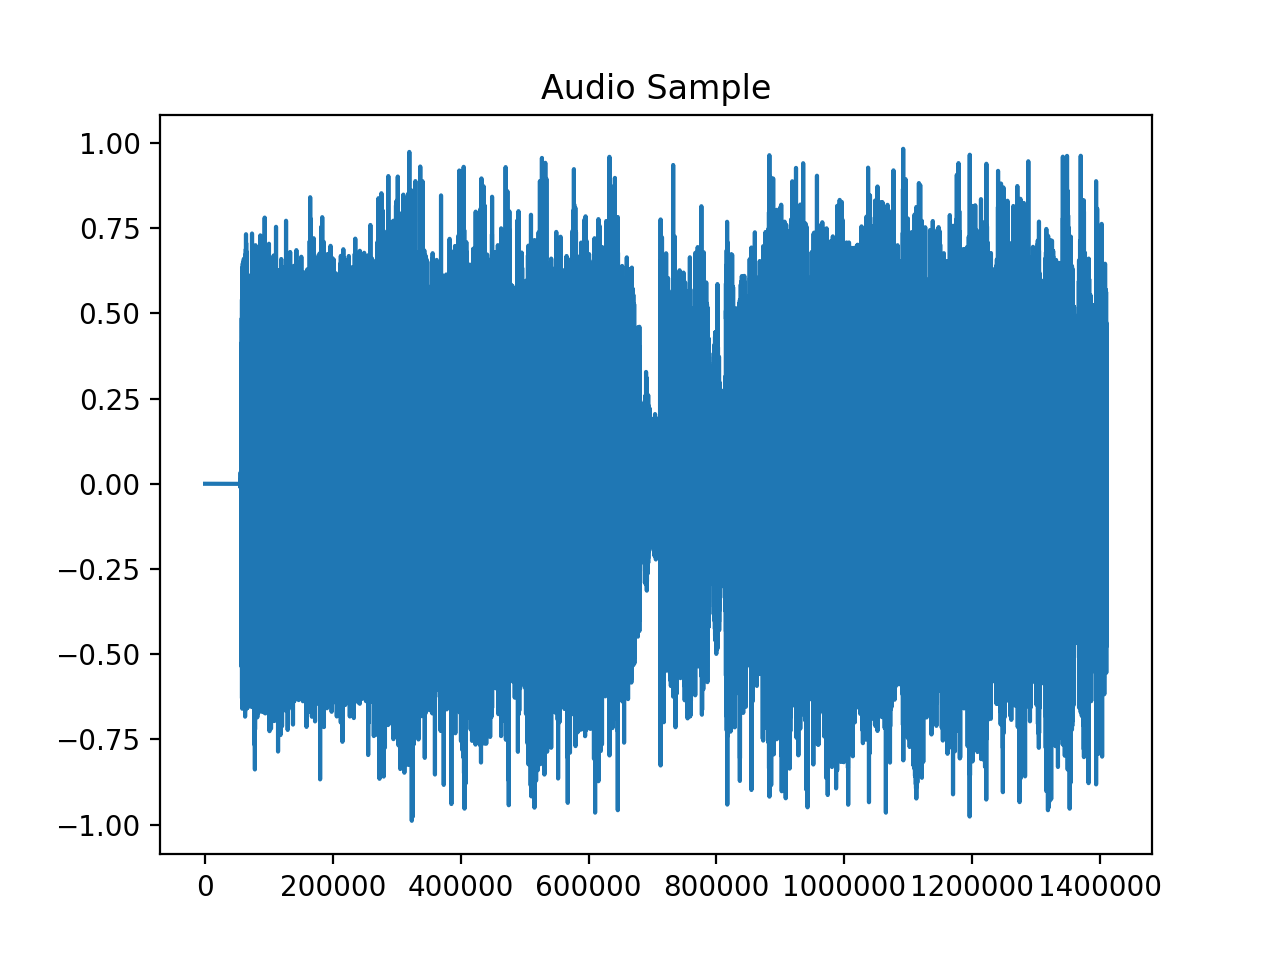

<IPython.core.display.Javascript object>


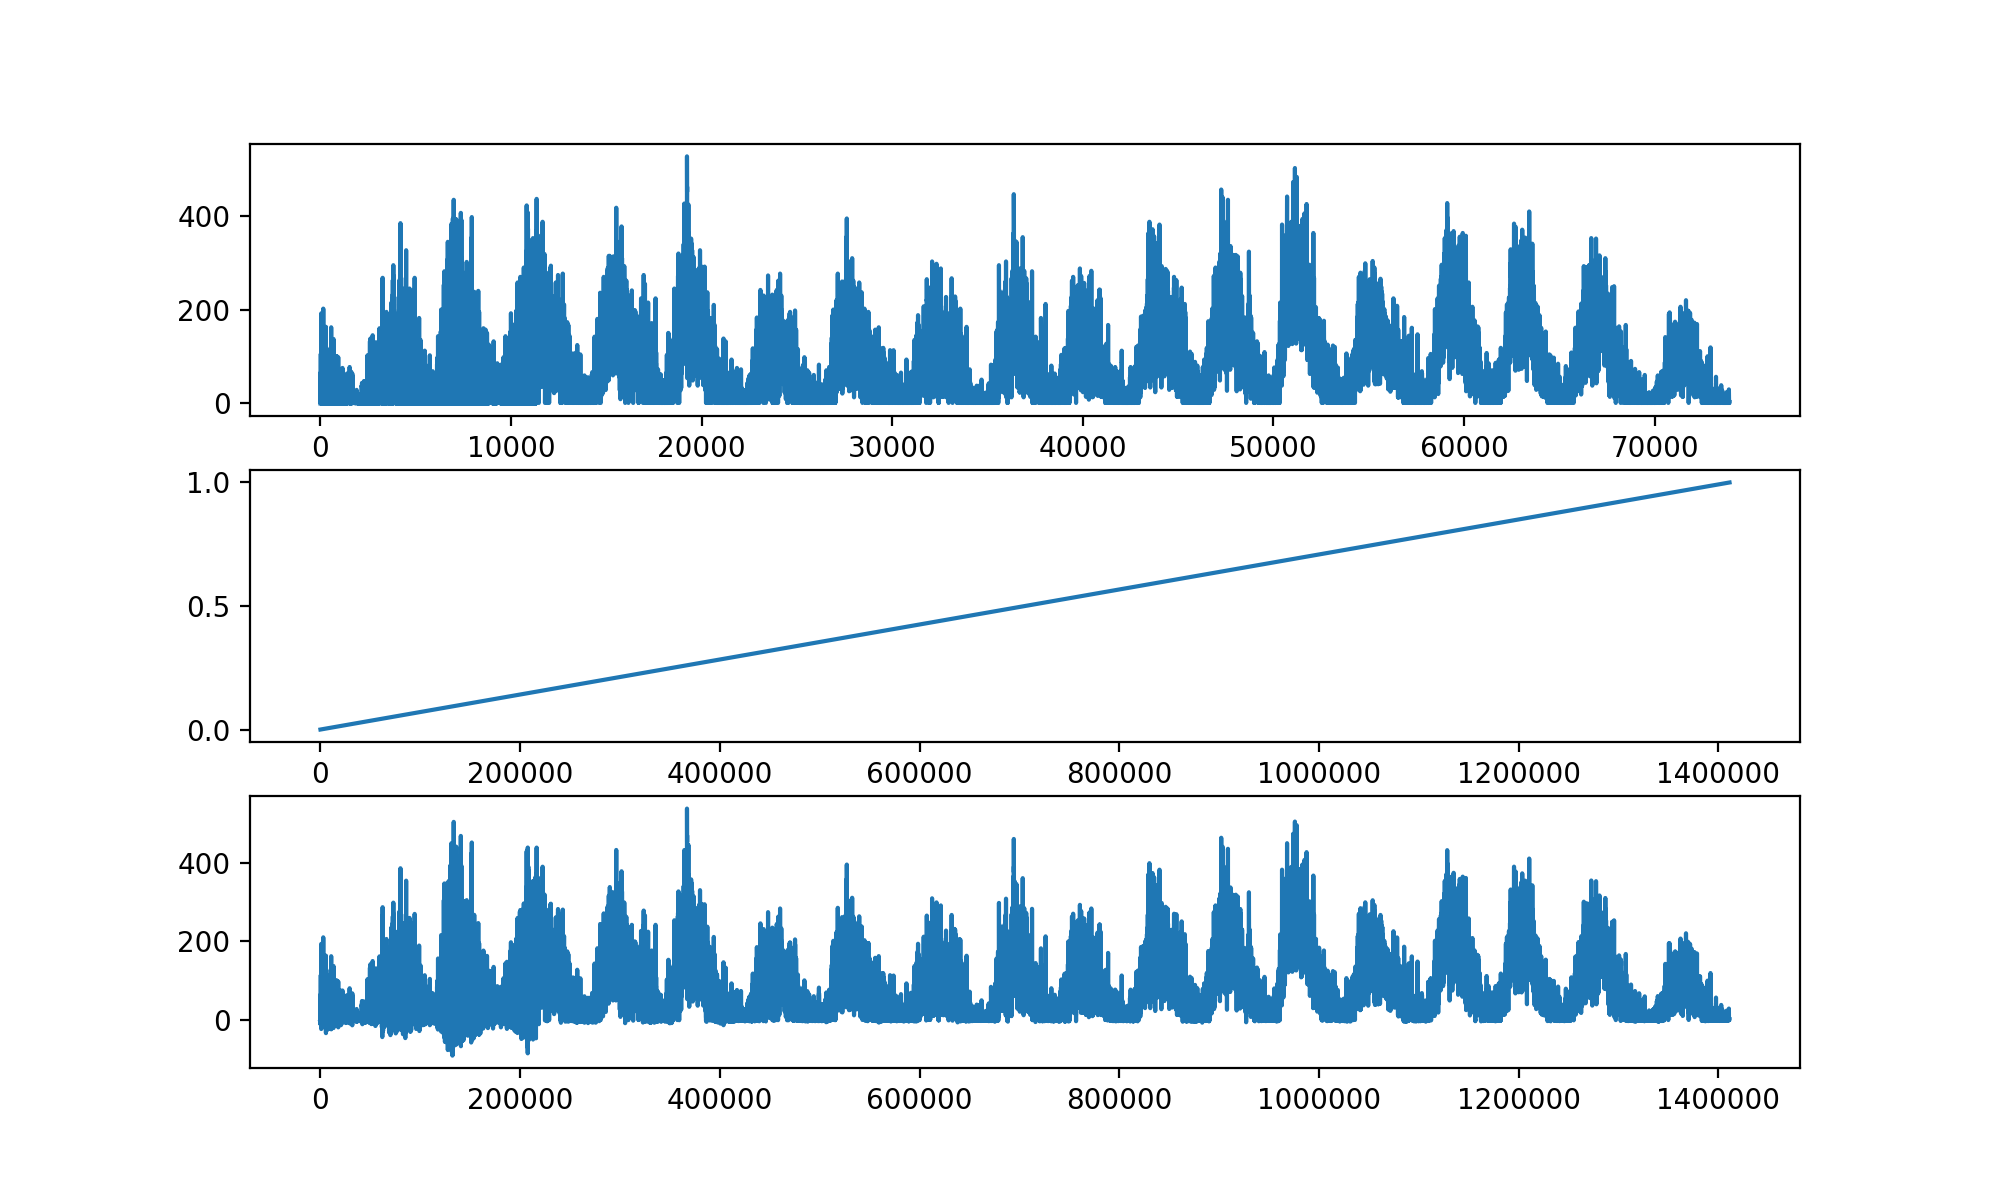

<IPython.core.display.Javascript object>


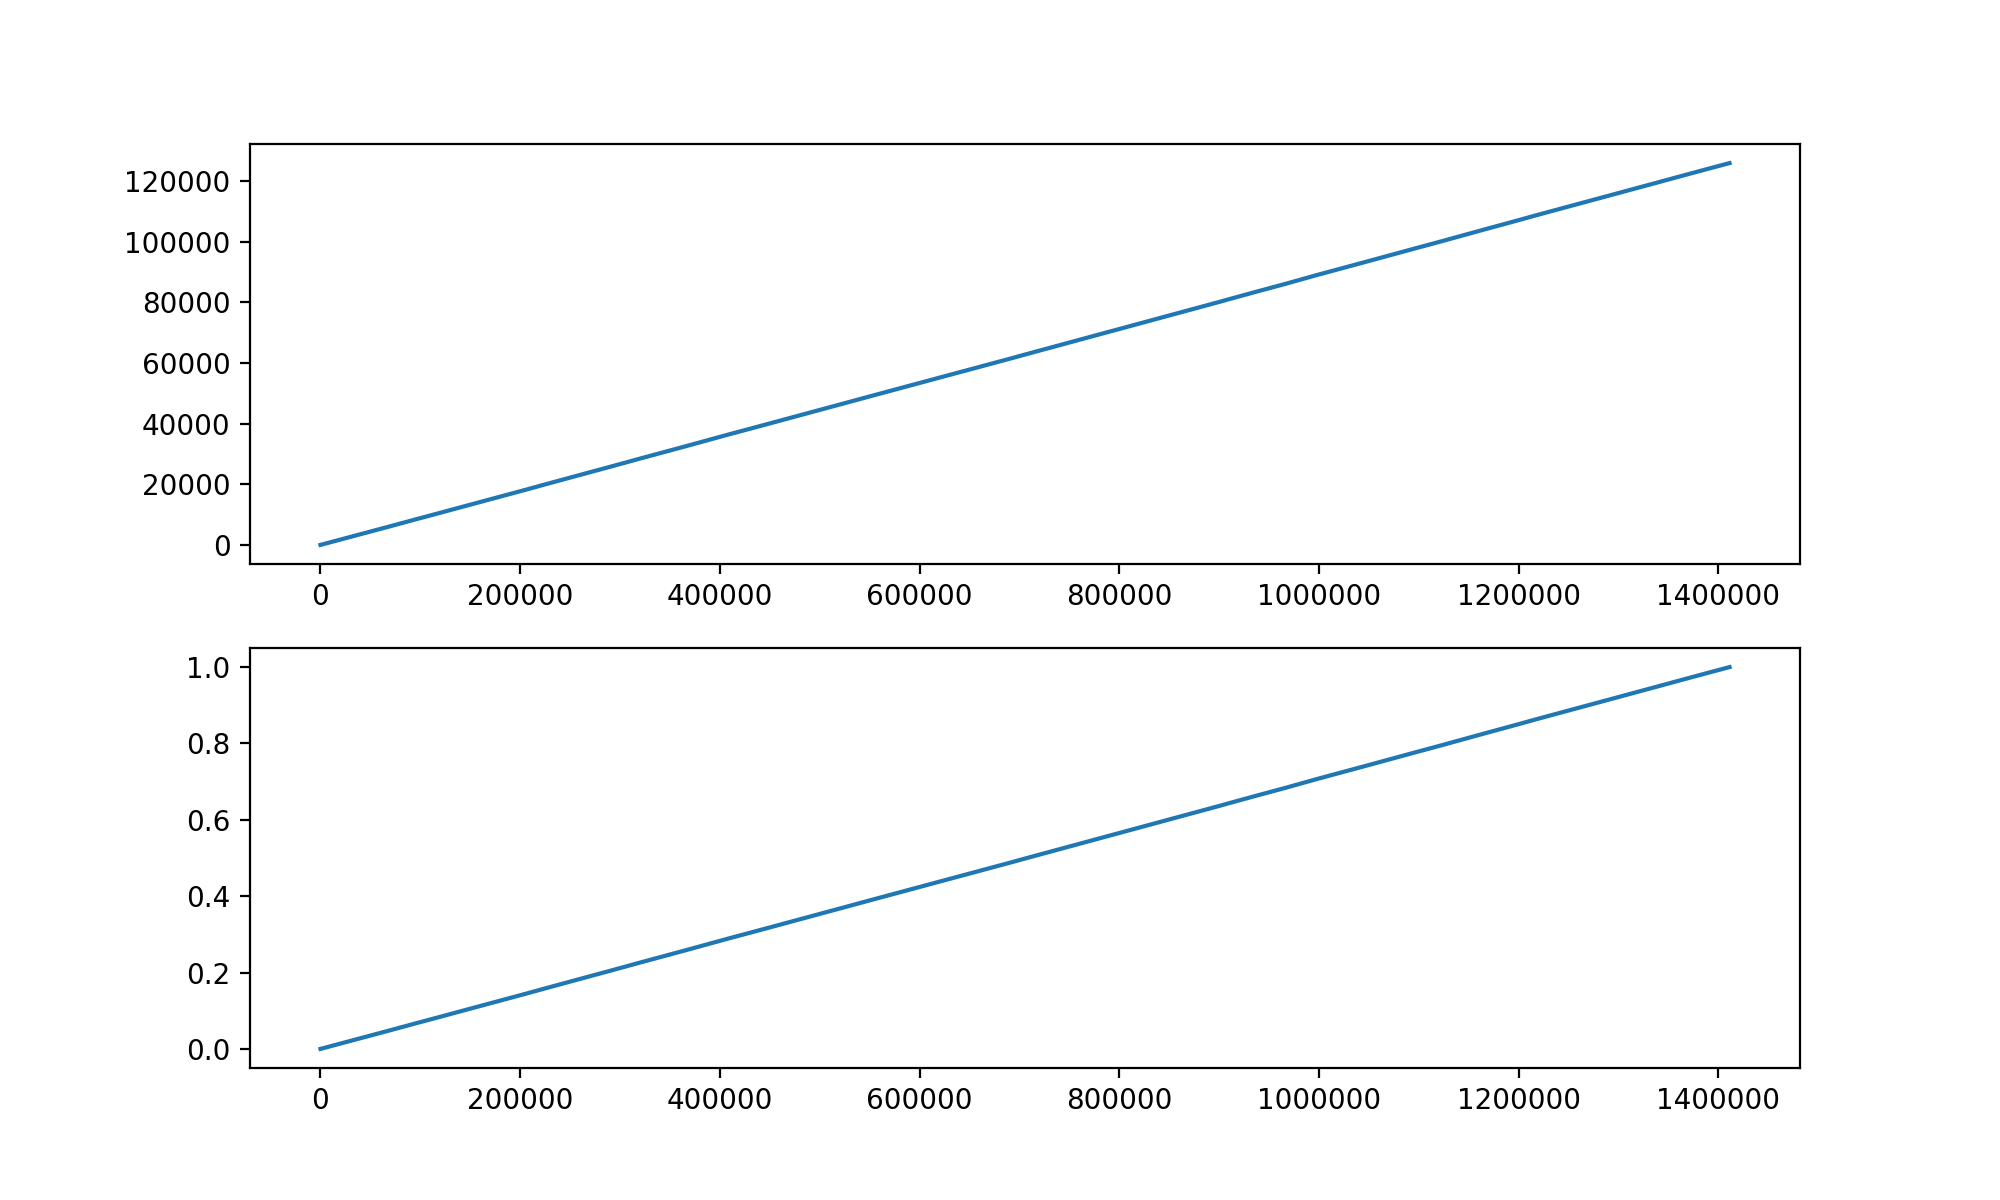

<IPython.core.display.Javascript object>


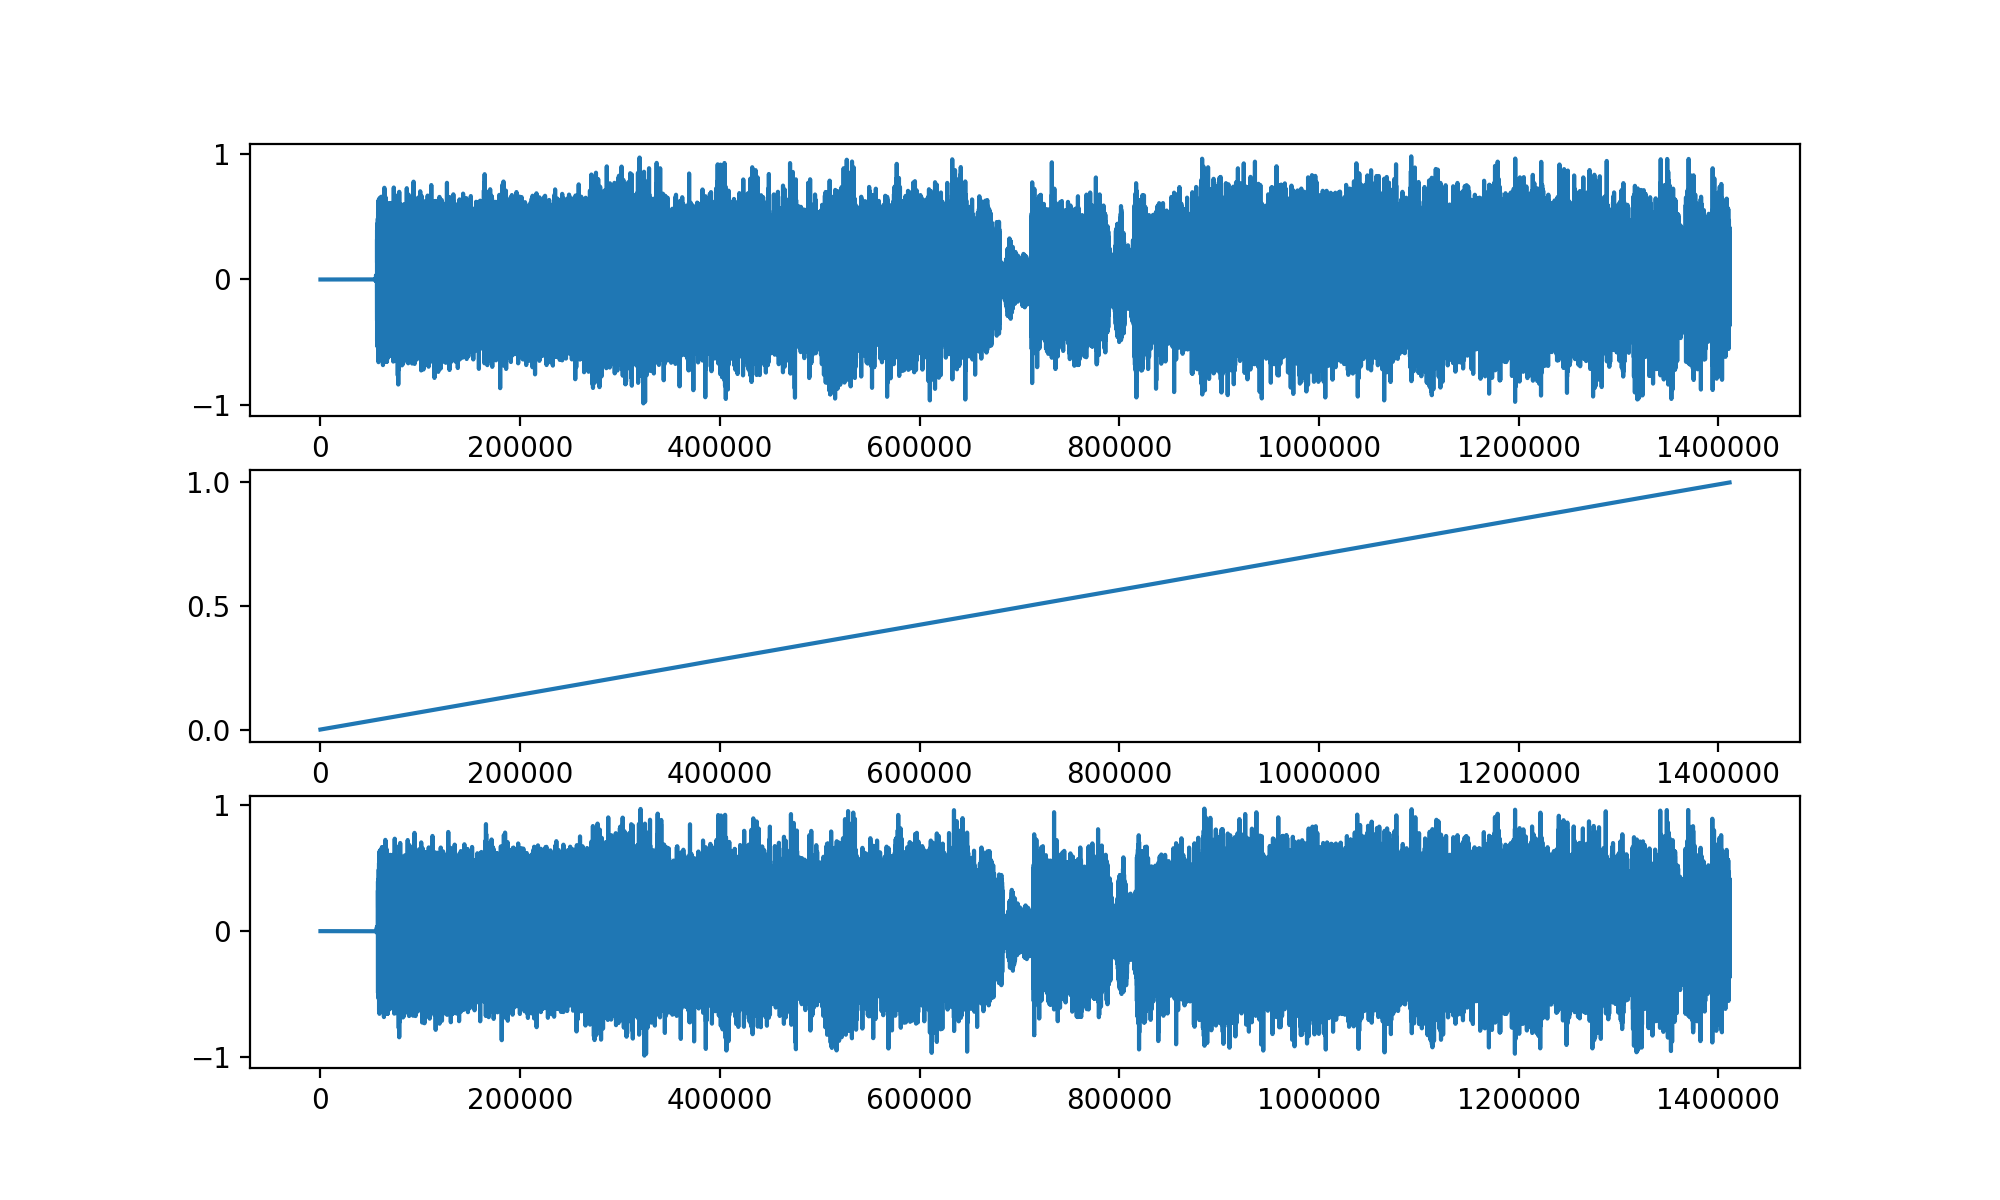

<IPython.core.display.Javascript object>


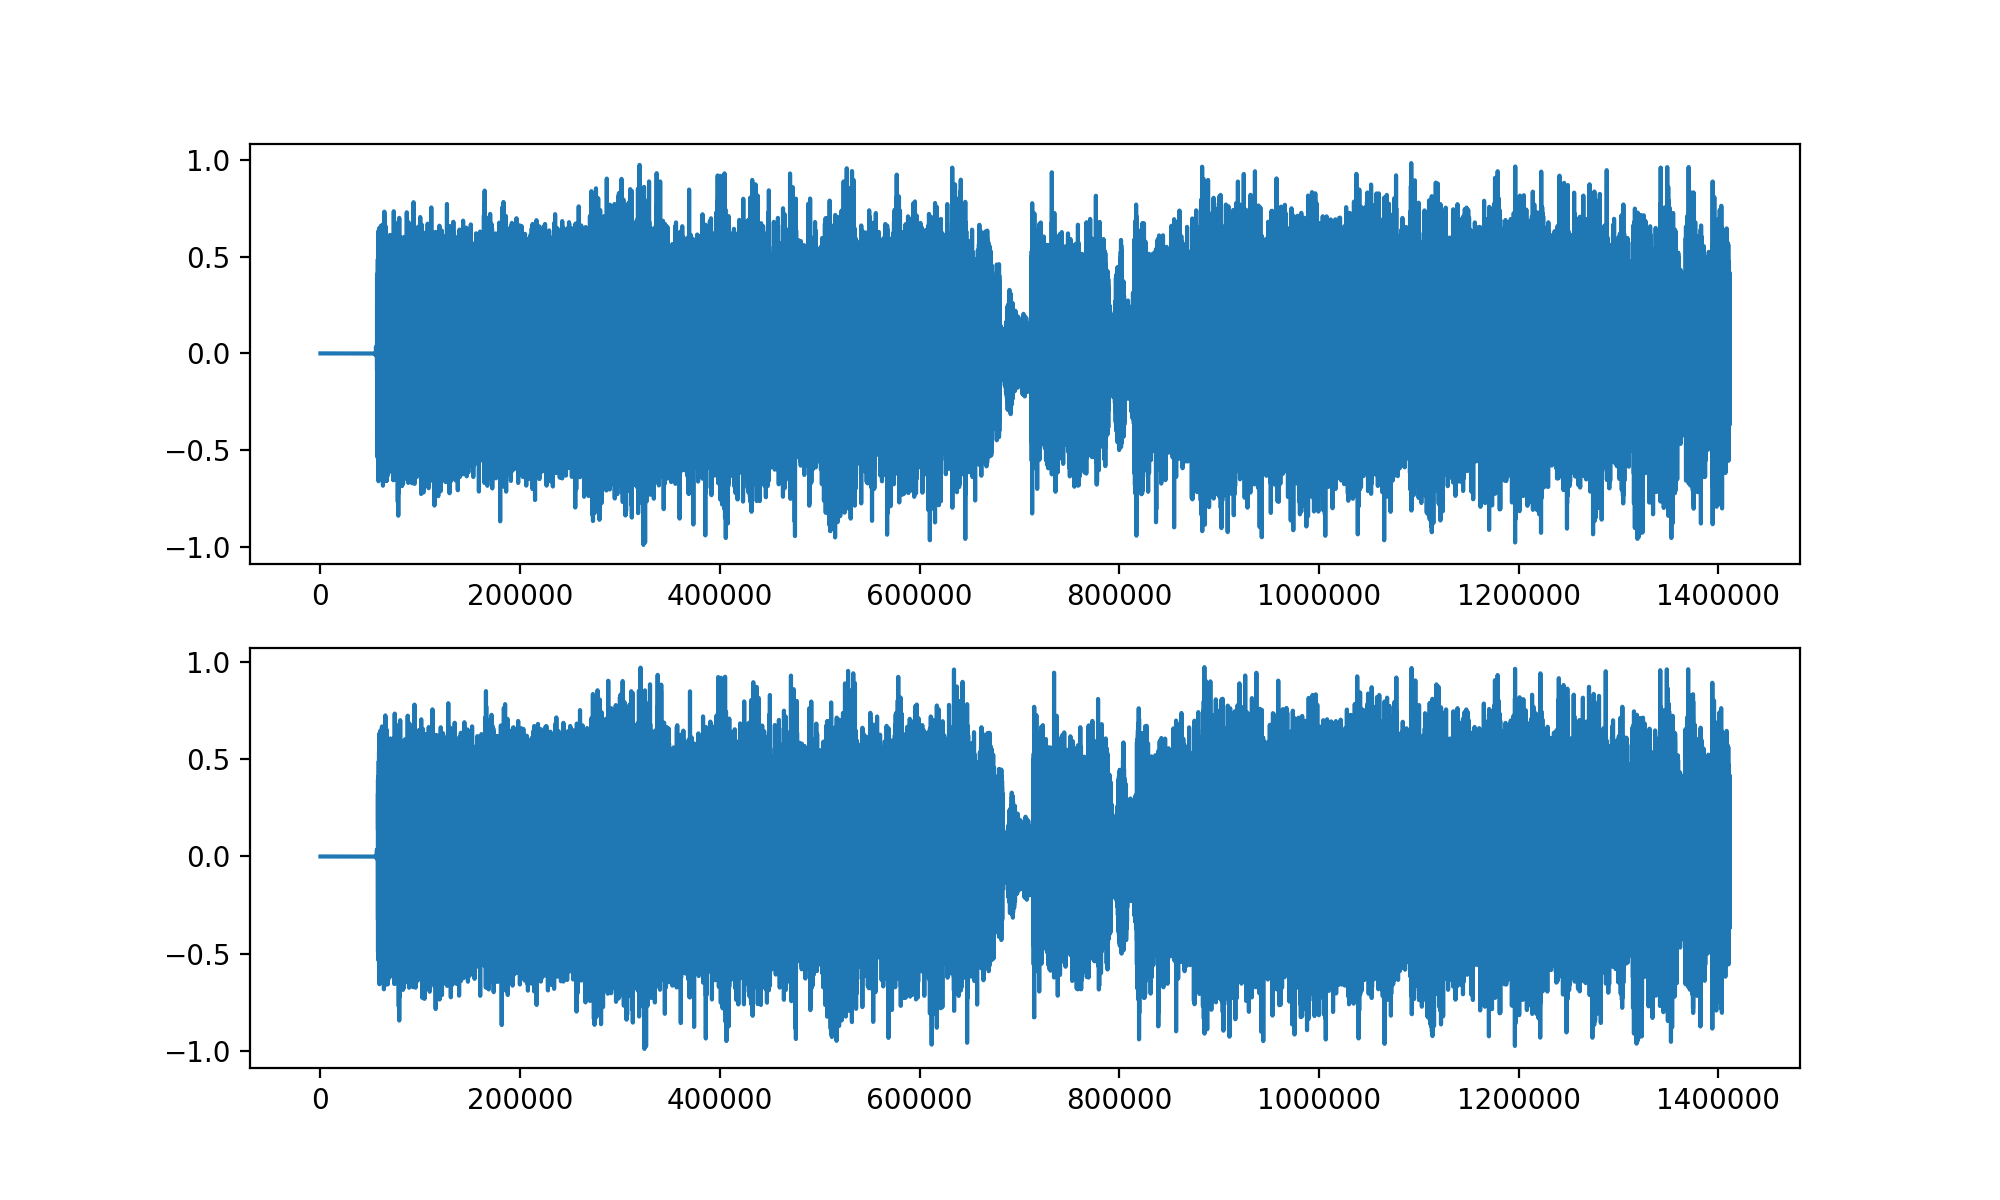

In [4]:
TS = extractData()

fs = 44100
AS, sr = librosa.load("Suprise.wav", sr=fs)

plt.plot(AS)
plt.title("Audio Sample")

#Interpolate Time Series to size of Audio Sample
fac = len(AS)/len(TS)
N = len(TS)
x = np.linspace(0, 1, N)
f = interpolate.interp1d(x,TS,kind='cubic')
xnew = np.linspace(0, 1, int(fac*N))
NTS = f(xnew)

#take cumsum of interpolated A
SNTS = positive_data_scale(NTS,6)
SInteg = np.cumsum(SNTS, axis=0)/fs
scale = SInteg[len(SInteg)-1]
SSTS = SInteg / scale

lA = len(AS)
xA = np.linspace(0, 1, lA)
fA = interpolate.interp1d(xA,AS,kind='cubic')
IAS = fA(SSTS)

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(TS)
plt.subplot(312)
plt.plot(xnew)
plt.subplot(313)
plt.plot(NTS)


plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(SInteg)
plt.subplot(212)
plt.plot(SSTS)


plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(AS)
plt.subplot(312)
plt.plot(SSTS)
plt.subplot(313)
plt.plot(IAS)

plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(AS)
plt.subplot(212)
plt.plot(IAS)


In [7]:
#Modulated Audio
ipd.Audio(IAS, rate=fs)

In [8]:
#Original Audio
ipd.Audio(AS, rate=fs)